In [1]:
#library
library("ggplot2")

In [2]:
#Dataset 
Liszt <- read.csv("homework.csv", header=TRUE, sep=",")

Same as for the other homeworks, we first define the dataset. We then take a quick look at our data:

In [3]:
#First data overview
head(Liszt)

Gender,Class.Year,Marital.Status,Major,Next.Degree,FY04Giving,FY03Giving,FY02Giving,FY01Giving,FY00Giving,AttendenceEvent
M,1957,M,History,LLB,2500,2500,1400,12060,12000,1
M,1957,M,Physics,MS,5000,5000,5000,5000,10000,1
F,1957,M,Music,NONE,5000,5000,5000,5000,10000,1
M,1957,M,History,NONE,0,5100,200,200,0,1
M,1957,M,Biology,MD,1000,1000,1000,1005,1000,1
F,1957,M,Mathematics,NONE,0,0,0,0,0,0


In [4]:
#Rowcalculation
Liszt$TGiving=Liszt$FY04Giving+Liszt$FY03Giving+Liszt$FY02Giving+Liszt$FY01Giving+Liszt$FY00Giving

Here we calculate the total donation per student so we can later segment our dataset.

Since we are asked to "construct the 95% confidence interval for the mean of total contributions and interpret this interval" we first need to calculate the mean of total contributions:

In [5]:
#Mean
meana=mean(Liszt$TGiving)

In [6]:
print(meana)

[1] 980.0436


In [7]:
xa <- seq(Liszt$TGiving)

Thanks to the previous line we can try to take a first look at the data using figures:

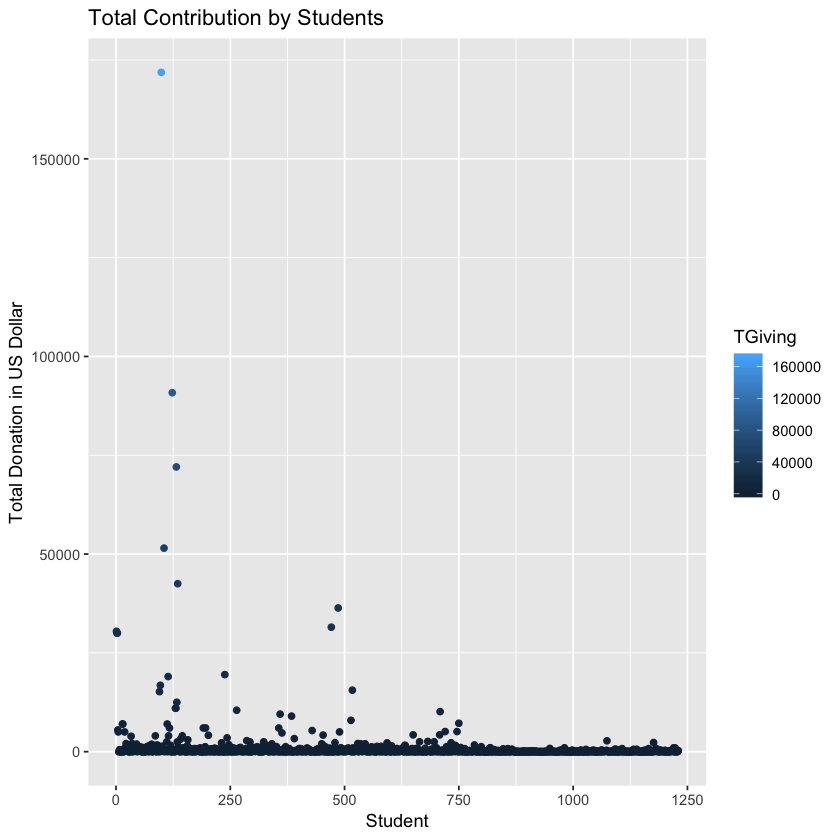

In [34]:
#Globalfigure
ggplot(data=Liszt, aes(x=xa,y=TGiving, colour=TGiving)) + geom_point() +
ggtitle("Total Contribution by Students") +
  xlab("Student") + ylab("Total Donation in US Dollar")

The data is very condensed in the lower part. Let's take a look with a different figure:

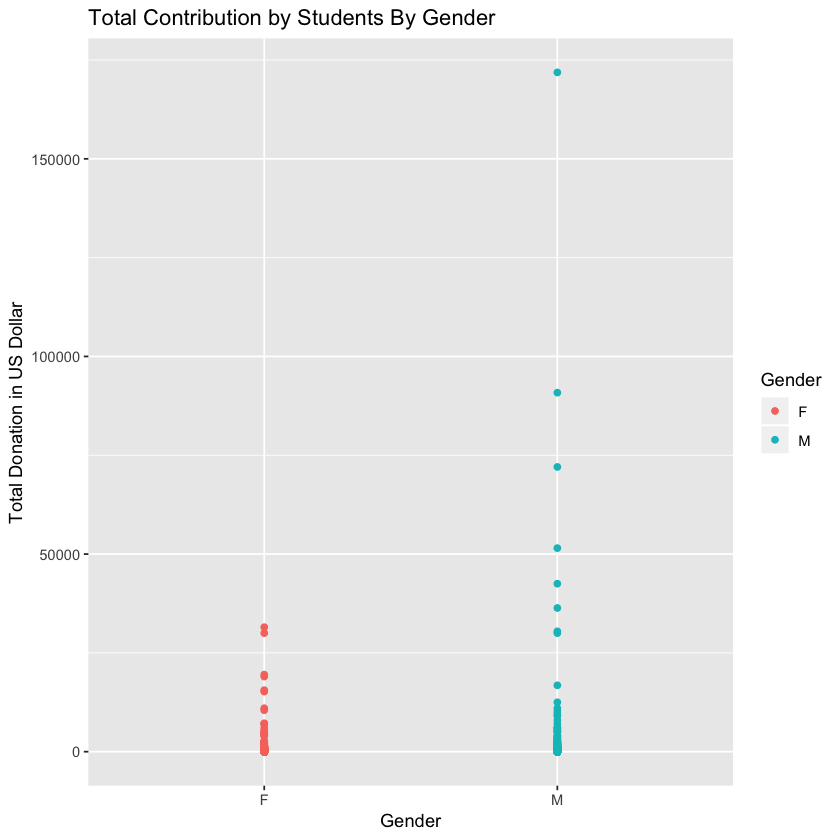

In [35]:
ggplot(data=Liszt, aes(x=Gender,y=TGiving, colour=Gender)) + geom_point()+
ggtitle("Total Contribution by Students By Gender") +
  xlab("Gender") + ylab("Total Donation in US Dollar")

Here we can confirm that most of our data is stacked between $0 and $50,000

For our formula, we need to have the total number of contribution, it can be calculated by counting the number of rows in the dataset:

In [39]:
numbera <- nrow(Liszt)

In [40]:
print(numbera)

[1] 1230


Since we are working on a sample and we do not know the standard deviation, we will first use the T-distribution to compute our confidence interval.

By following the code given in course #4, we can determine the correct value for a 95% confidence interval. 0.95 corresponds to 90% confidence interval and 5% left in each tail therefore, if we want to know the number for 95% confidence interval we can have the following logic: if 0.95 is 5% in each tail, then to have 2.5% in each tail which corresponds to 95% CI then 0.975 is the correct number.

In [41]:
#T-distribution
t=qt(0.975,numbera-1)

In [42]:
CIt = meana+c(-1,1)*t*sd(Liszt$TGiving)/sqrt(numbera)

In [43]:
print(CIt)

[1]  606.8797 1353.2074


But according to the internet, we cannot use t-distribution for sample size bigger than 30 (source:https://stats.stackexchange.com/questions/78961/t-test-for-more-than-30-samples). So we are using the normal distribution method:

In [46]:
#Z-distribution
za=qnorm(0.975)

In [47]:
CIza=meana+c(-1,1)*za*sd(Liszt$TGiving)/sqrt(numbera)

In [48]:
print(CIza)

[1]  607.2472 1352.8399


So with our result we can say that we are 95% confident that the true mean of total contribution is between $607.2472 and $1352.8399. 

Question 2: "Estimate the proportion of alumni who donate not less than 1000 in total with 95% confidence interval and interpret it."

To segment our dataset, we use the code given in the course:

In [15]:
#Segmentation
b=Liszt[Liszt$TGiving>=1000,]

Same exercice as above, we want to have a quick look at our data using figures again. Consequently we need to define our x-axis :

In [16]:
xb <- seq(b$TGiving)

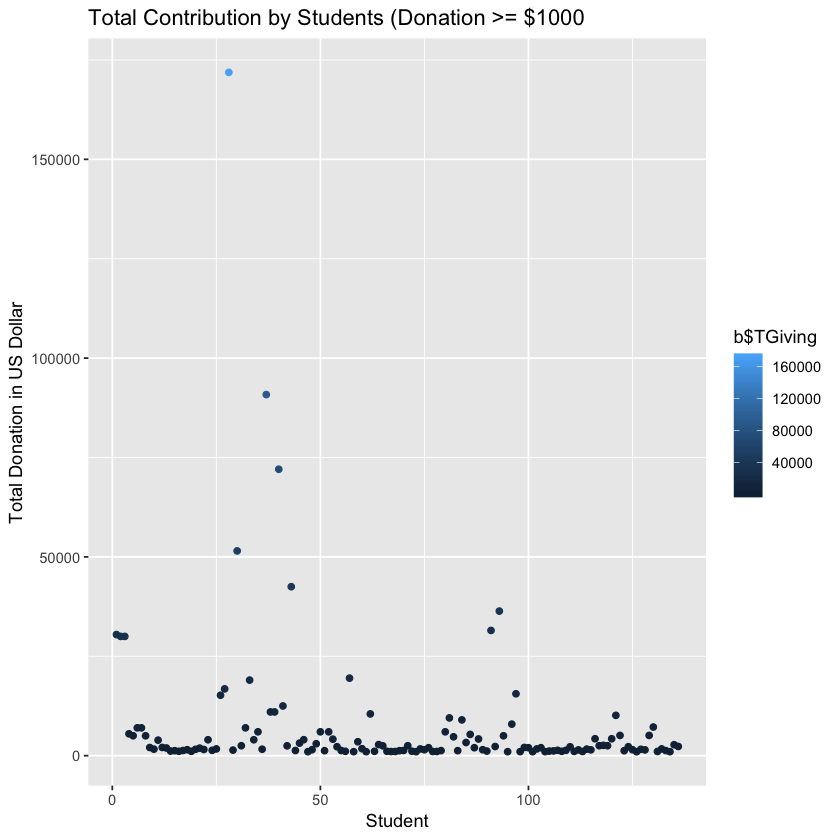

In [36]:
#Segmentationfigures
ggplot(data=b, aes(x=xb,y=b$TGiving, colour=b$TGiving)) + geom_point()+
ggtitle("Total Contribution by Students (Donation >= $1000") +
  xlab("Student") + ylab("Total Donation in US Dollar")

We can see here that our data does not show any predifined pattern

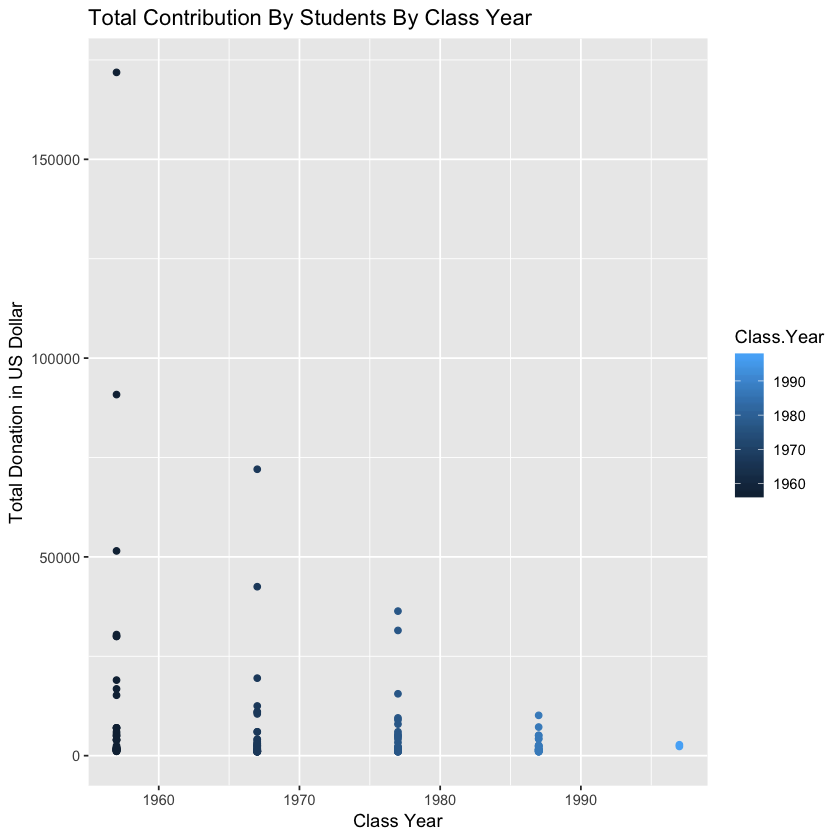

In [37]:
ggplot(data=b, aes(x=b$Class.Year,y=b$TGiving, colour=Class.Year)) + geom_point()+
ggtitle("Total Contribution By Students By Class Year") +
  xlab("Class Year") + ylab("Total Donation in US Dollar")

Here we can see that the donation may depend of the class year, but since it's not the exercice we will not go into it.

Let's calculate the proportion of high donator. So we need to count again the number of row:

In [19]:
numberb <- nrow(b)

In [20]:
print(numberb)

[1] 136


The proportion here can be calculated by the number of row segmented divided by the total number of population in our dataset.

In [65]:
#Proportion
p = numberb/numbera
cat(paste('Our segmentation contains ', p*100, ' % of the total dataset.'))

Our segmentation constitutes  11.0569105691057  % of the total dataset.

We use the same norm as the first question since our CI is also 95% for this question. We then use the code given in course #4 calculation for "confidence interval generated for proportion". 

In [23]:
zb=qnorm(0.975)

In [24]:
CIzb=p+c(-1,1)*zb*sqrt(p*(1-p)/numbera)

In [68]:
print(CIzb*100)

[1]  9.304368 12.809453


Here the proportion for CI is between 9.30% and 12.81%. It means that in our dataset, we are 95% confident that there are between 9.30% and 12.81% of people who donate an amount equal or exceeding $1000.

For the final question: we need to determine the minimum sample size.

In [26]:
#Samplingerror
e=100

Here e is the sampling error equals to 100.

We then apply the formula to calculate the sample size.

In [44]:
#Samplesize
N=(za*sd(Liszt$TGiving)/e)^2

In [45]:
print(N)

[1] 17094.19


Our required sample size is 17094.19 which is more than 10 times the original sample size (1230). Ergo, we can say that the current sample is insufficient for the parameters we want to use. Thus the required sample size is 17095 (since we always round up sample size). As a reminder we are using 95% confidence interval. 

Let's compare both our samples:

In [49]:
comparison = N/numbera

In [50]:
print(comparison)

[1] 13.89771


If we compare both sample size we can actually see that the minimum sample size for question 3 is 14 times more important than the initial sample size (question 1).

Let's visualize the difference between both:

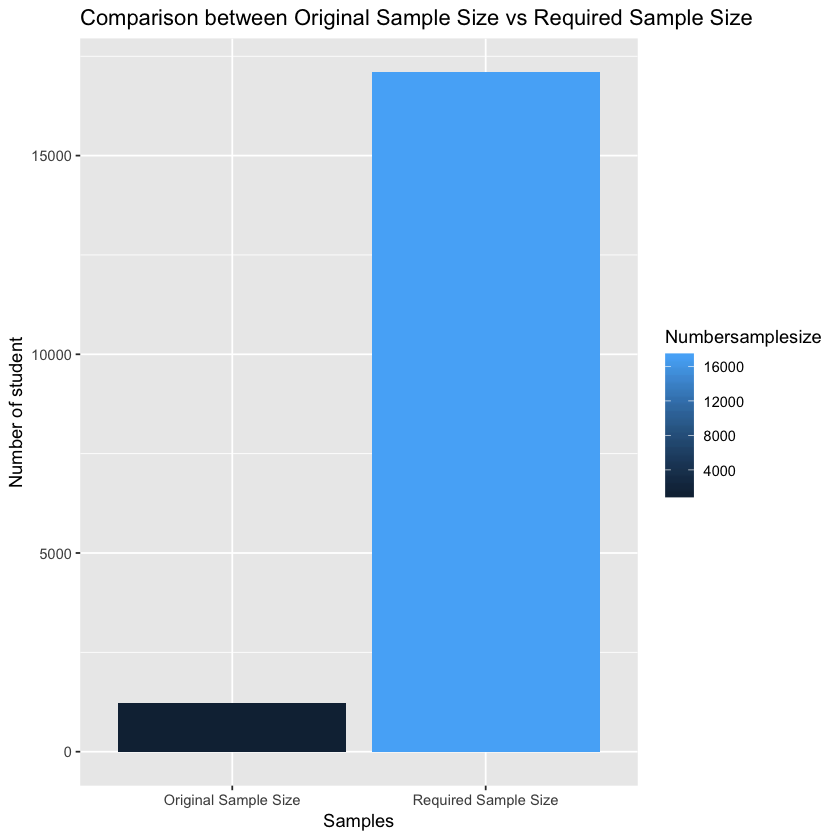

In [62]:
#Comparisonfigure
Samplesize=c("Original Sample Size","Required Sample Size")
Numbersamplesize=c(numbera, N)
df1=data.frame(Samplesize,Numbersamplesize)
ggplot(df1, aes(x=Samplesize, y=Numbersamplesize, fill=Numbersamplesize)) +
    geom_bar(stat='identity', position="dodge")+
    ggtitle("Comparison between Original Sample Size vs Required Sample Size") +
  xlab("Samples") + ylab("Number of student")

The final figure just highlights the difference is between both sample. 

####The following figure is a failure and not part of what I consider the homework. However, I would appreciate any feedback to fix it. 

In [29]:
#####"TRY PART" (PLEASE DONT EVALUATE THIS ONE SINCE I FAILED)
Liszt$Mean <- rowMeans (Liszt[,c("FY00Giving","FY01Giving","FY02Giving","FY03Giving","FY04Giving")])

The objective here is to plot the confidence interval in the global dataset. Therefore, we need to have the mean and the standard deviation for each row in the dataset.

In [30]:
Liszt$SD <- apply(Liszt[,6:10],1,sd)

We now have the mean and SD for each row, the figure below however do not work:

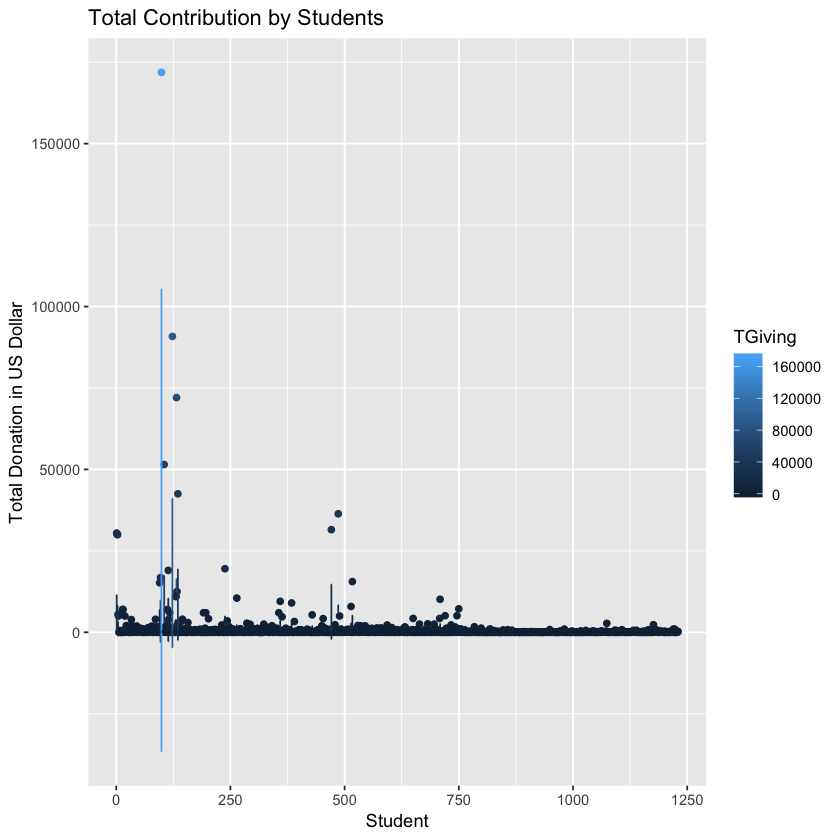

In [38]:
ggplot(data=Liszt, aes(x=xa,y=TGiving, colour=TGiving)) + geom_point() +
geom_errorbar(aes(ymin=Liszt$Mean-Liszt$SD,ymax=Liszt$Mean+Liszt$SD))+
ggtitle("Total Contribution by Students") +
  xlab("Student") + ylab("Total Donation in US Dollar")